In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
plt.style.use('Solarize_Light2')
plt.rcParams['figure.figsize'] = 18,6

In [2]:
covid = pd.read_csv(
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/who_covid_19_situation_reports/who_covid_19_sit_rep_time_series/who_covid_19_sit_rep_time_series.csv',
    skiprows=range(1,41),
)

In [3]:
def preprocess(covid):
    covid = covid[:206]
    print(covid.shape)
    covid = covid.drop(columns=[
        'WHO region',
        'Province/States'
    ]).groupby('Country/Region').sum().transpose()
    covid.index = pd.to_datetime(covid.index)
    covid.index.name = 'Date'
    covid.columns.name = 'Country'
    return covid

In [4]:
def window_plot(country, num_peaks=1, ax=None):
    start_date = rolling.index[0].date()
    end_date = rolling.index[-1].date()
    ax = rolling[country].plot(ax=ax);
    for peak in all_peaks[country][-num_peaks:]:
        ax.axvline(rolling.index[peak], color='orange')
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Daily New Cases', fontsize=12)
    ax.set_title(f'Seven Day Rolling Sum of Total Cases \nin {country} from {start_date} to {end_date}', fontsize=12);
    plt.show()

In [5]:
def plot_all(num_peaks, case_threshold):
    for country in rolling.columns:
        if rolling[country].max() > case_threshold:
            window_plot(country, num_peaks)

In [6]:
covid = preprocess(covid)

(206, 77)


In [7]:
rolling = covid.diff().rolling(7).sum()

In [8]:
all_peaks = rolling.apply(find_peaks).apply(lambda x: x[0])

In [9]:
all_peaks.Brazil

array([56, 61, 65, 69])

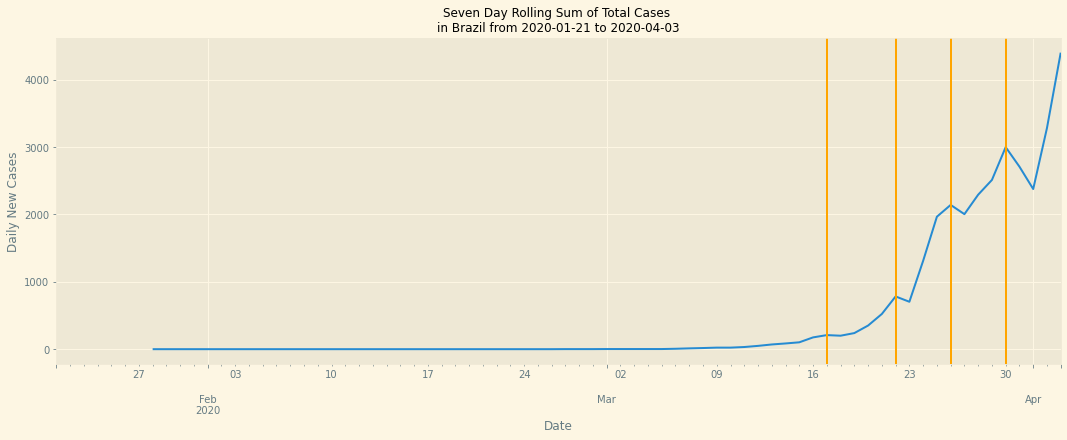

In [10]:
window_plot('Brazil', 4)

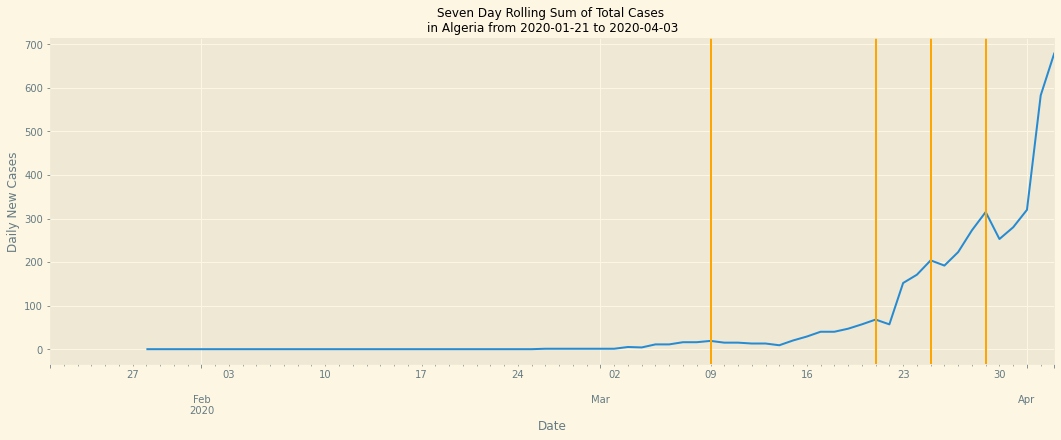

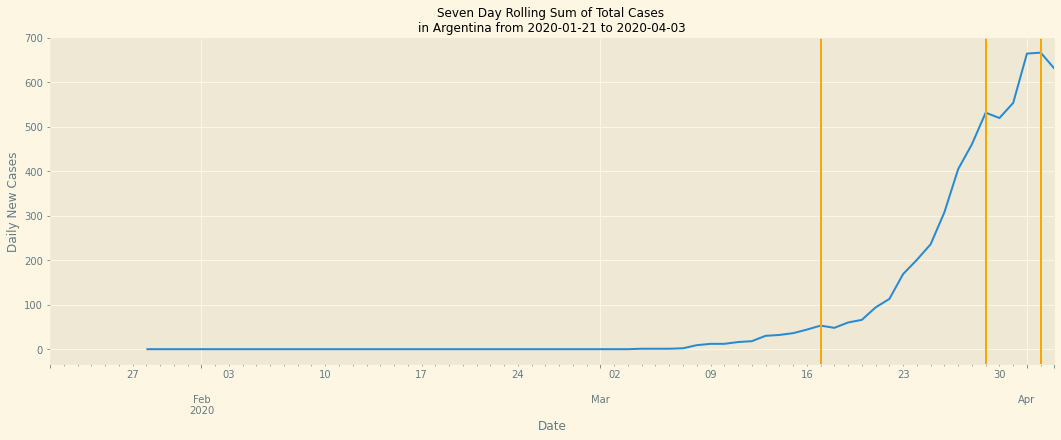

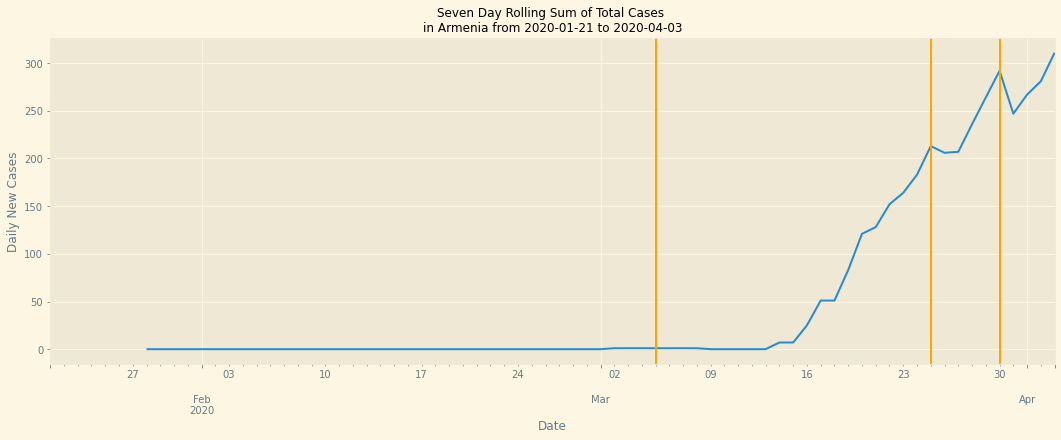

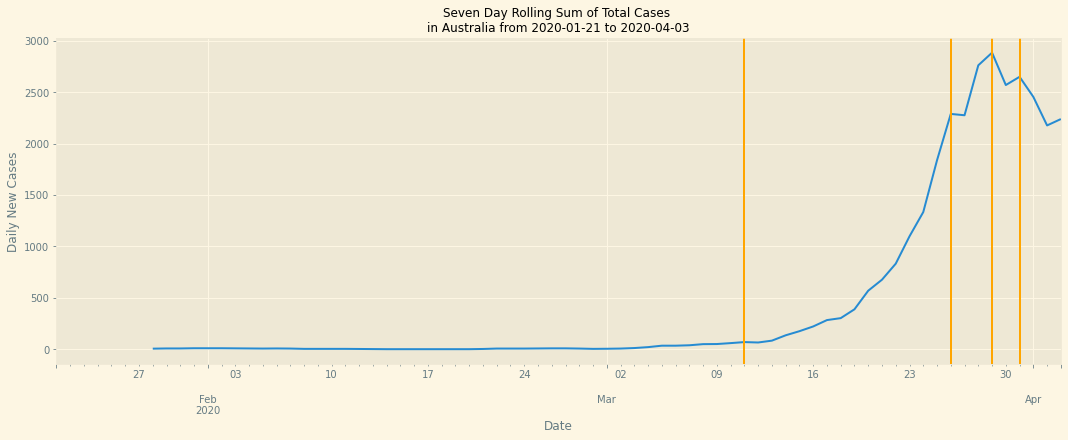

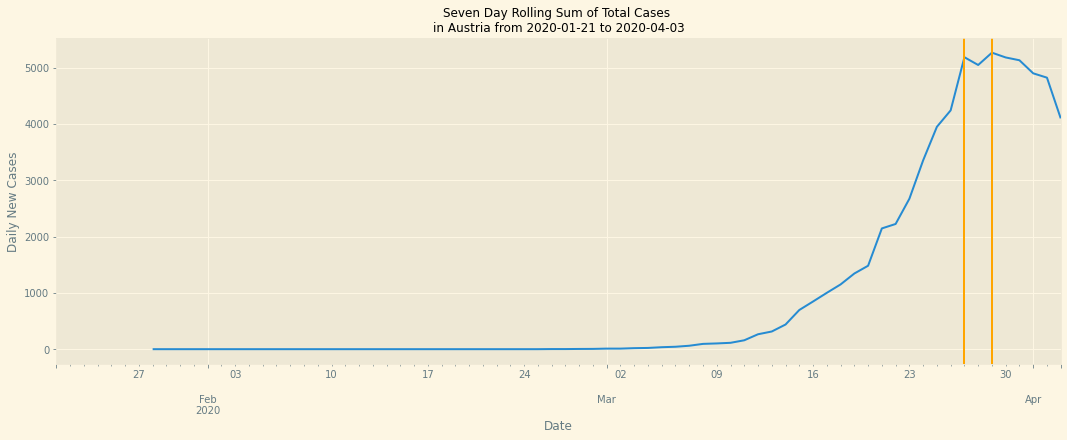

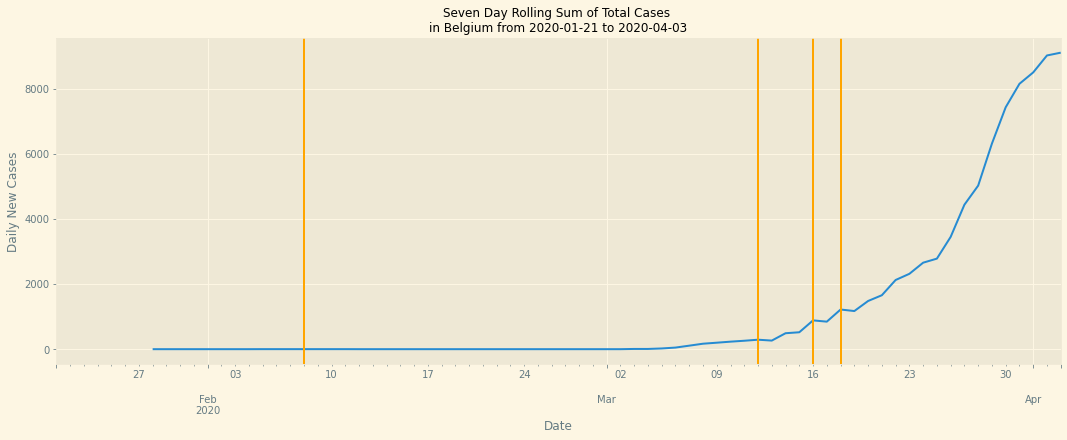

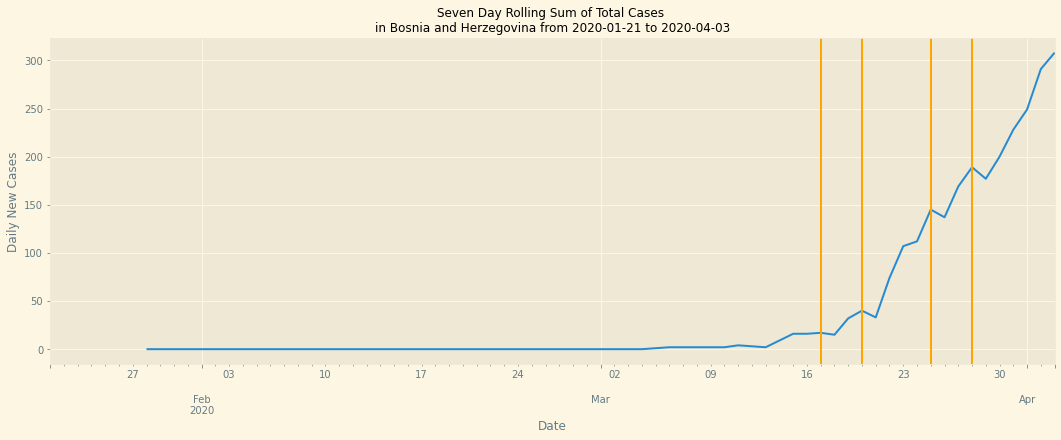

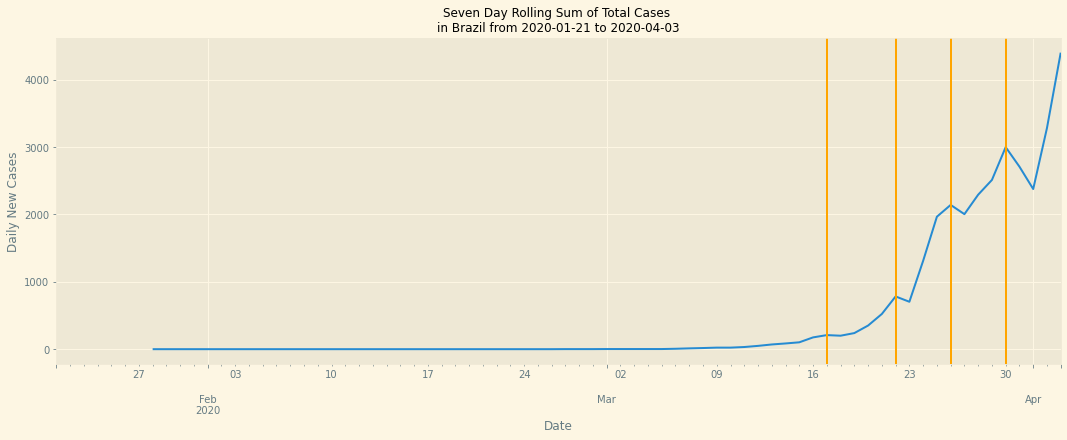

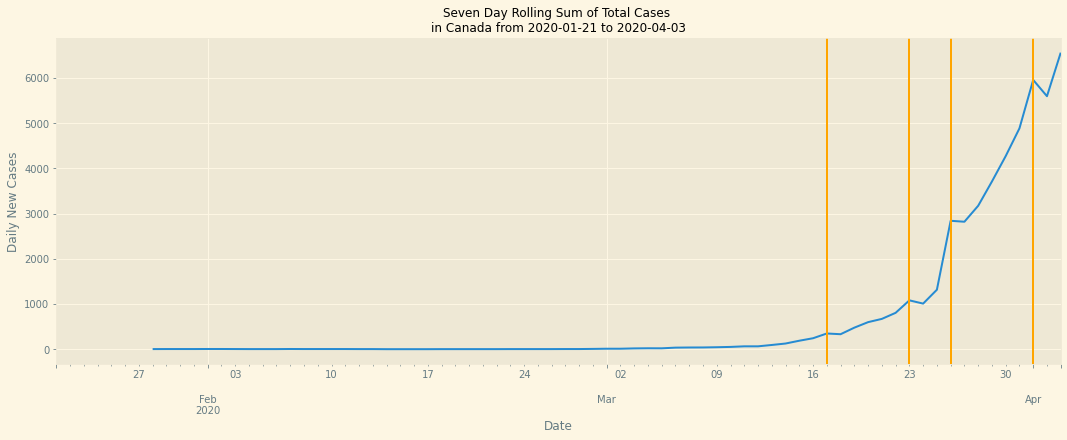

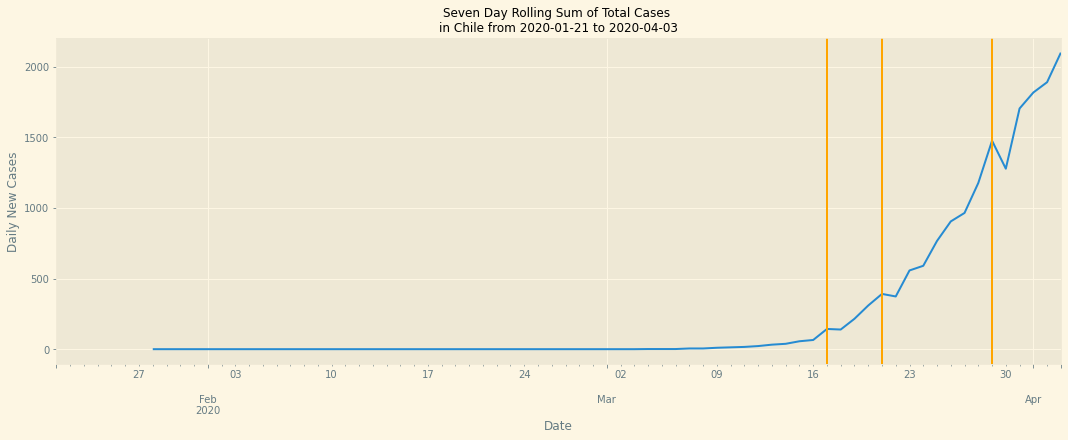

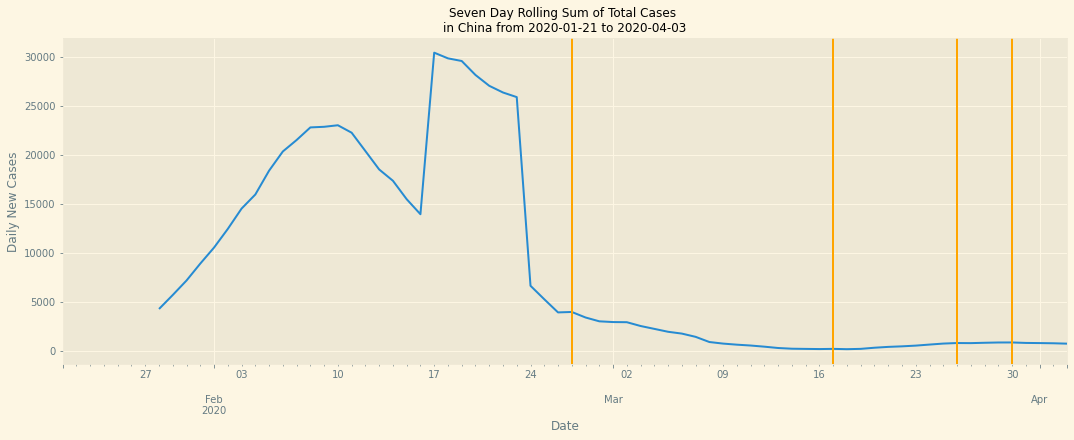

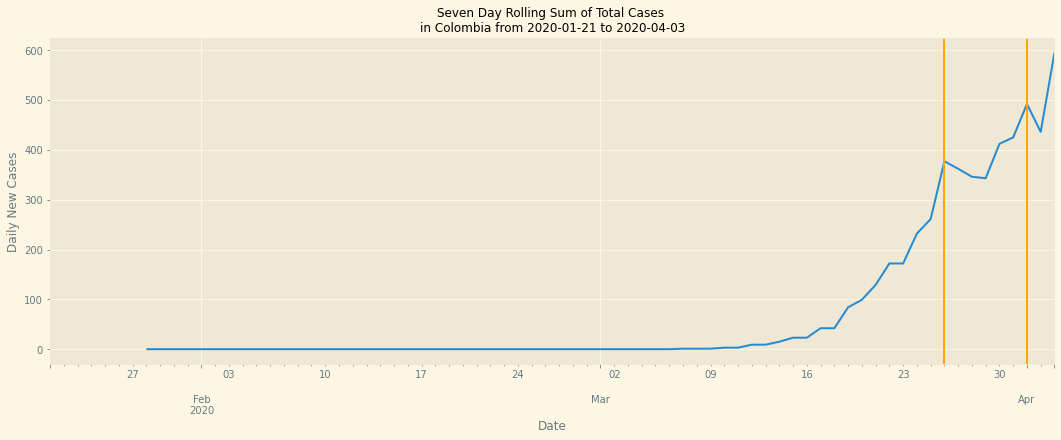

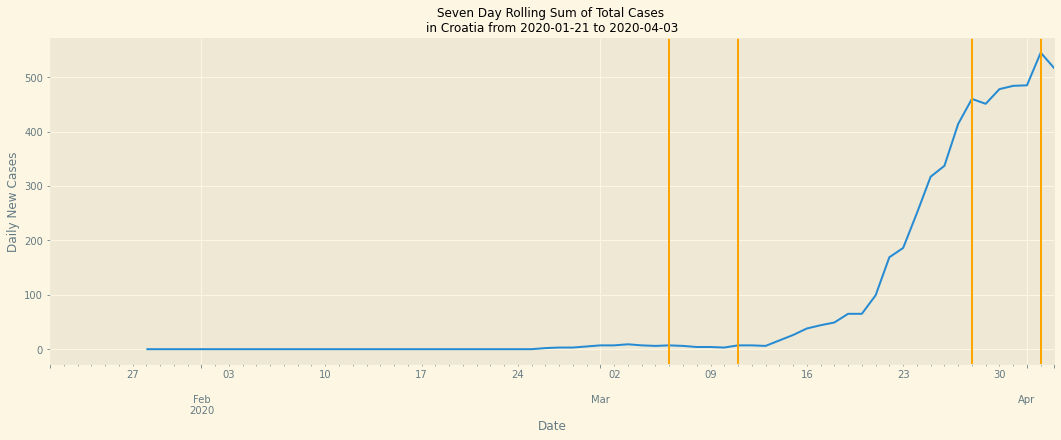

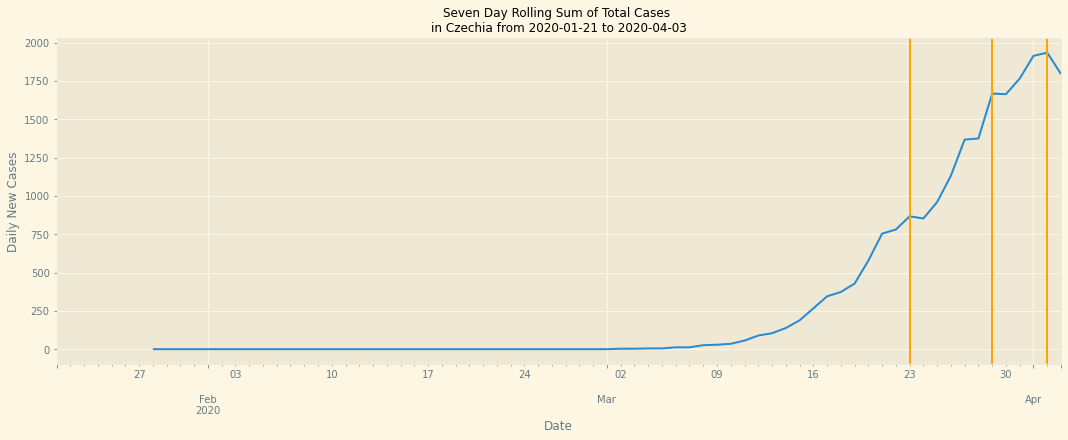

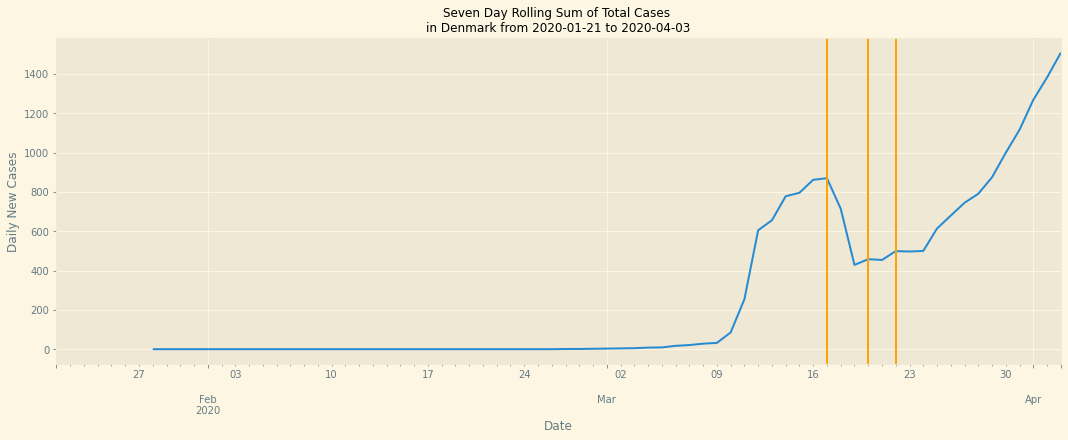

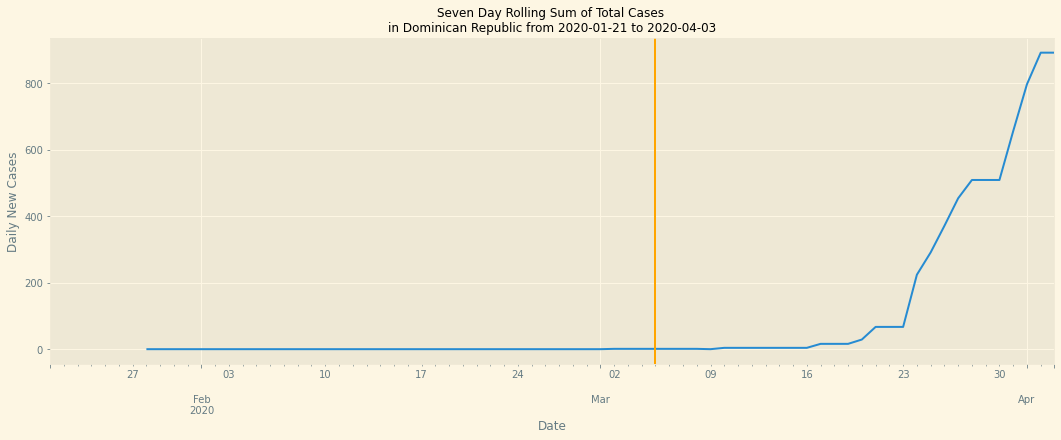

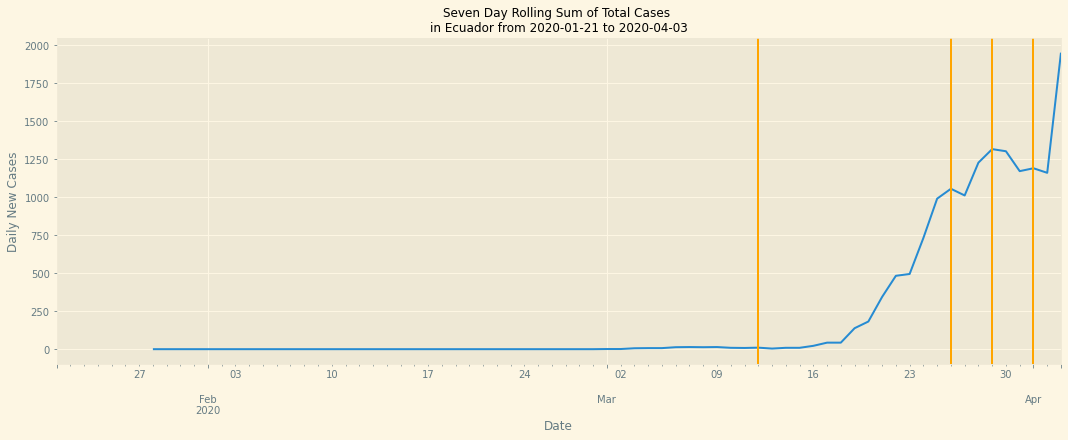

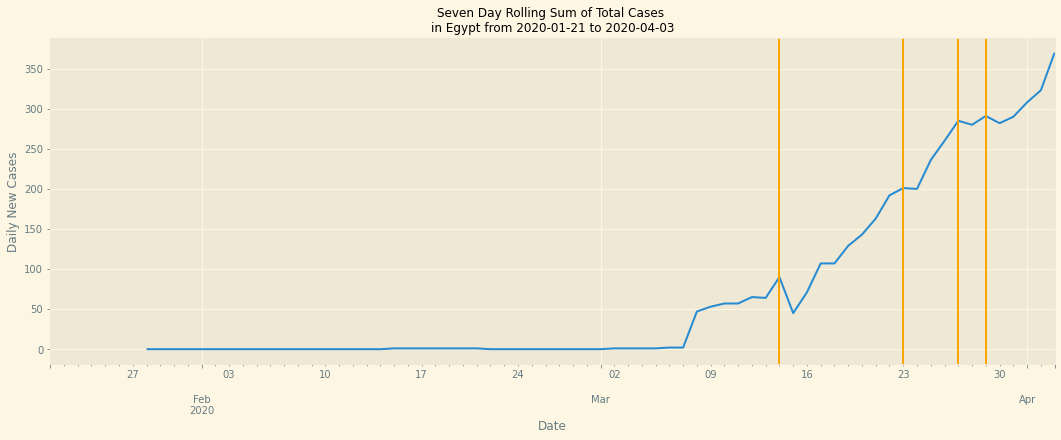

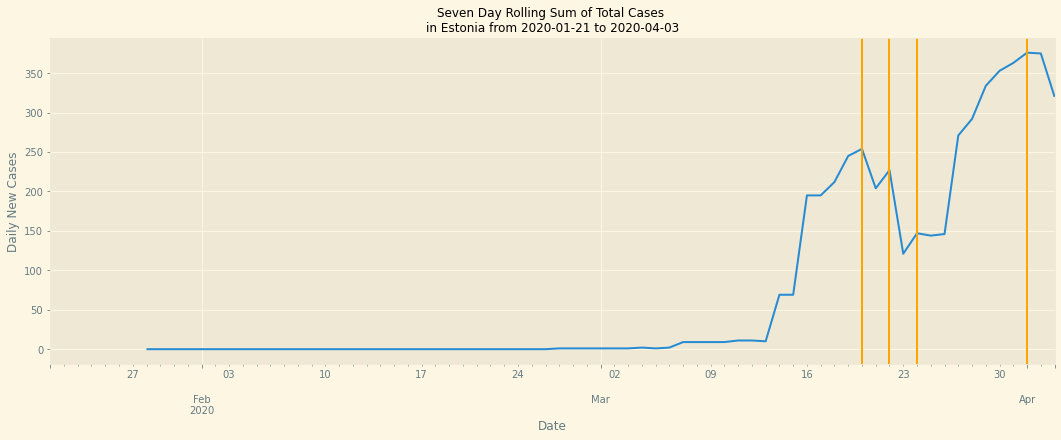

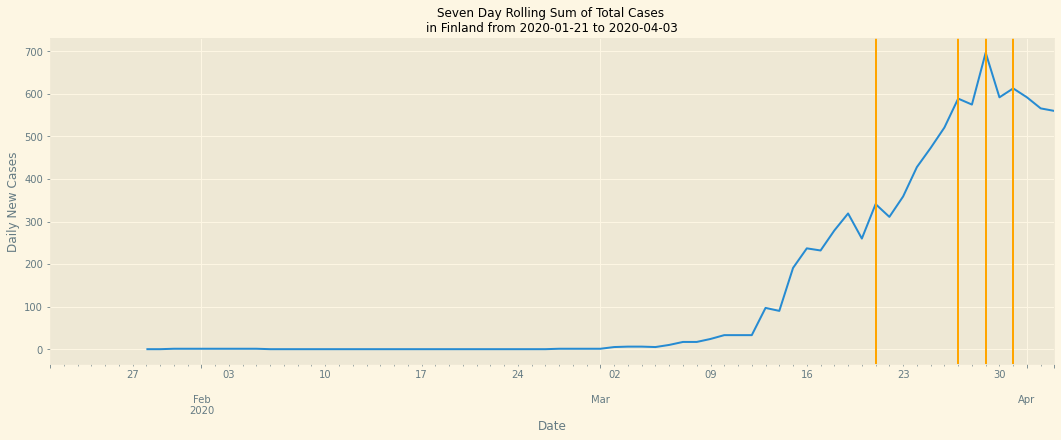

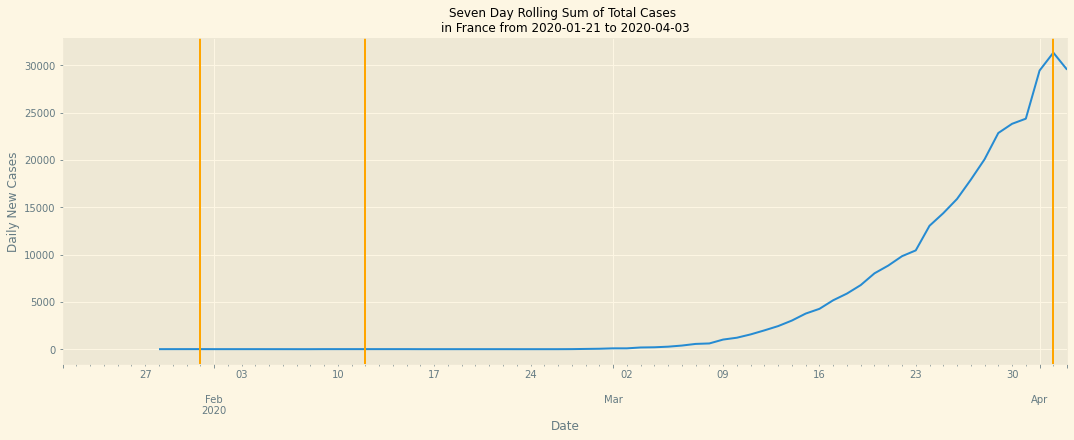

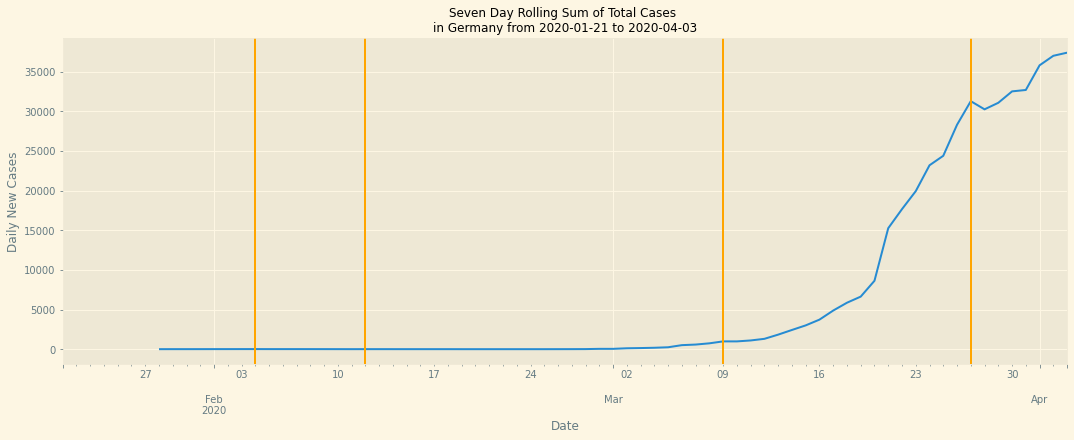

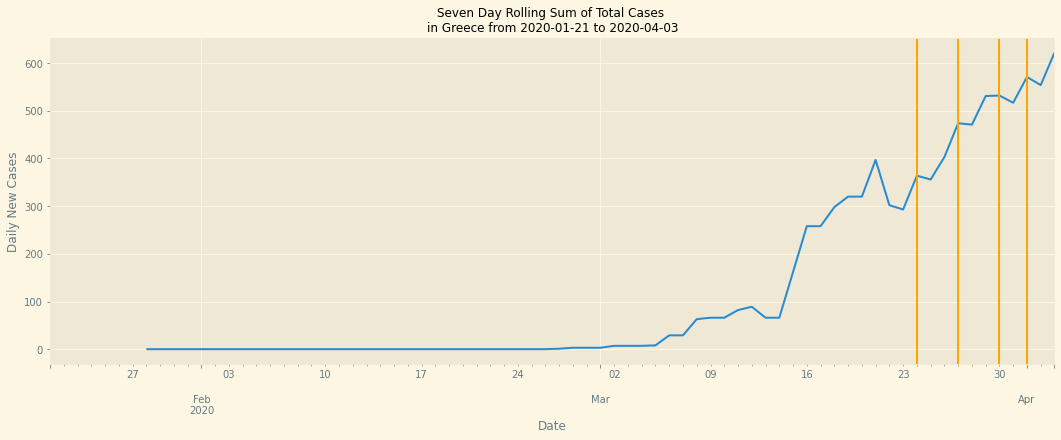

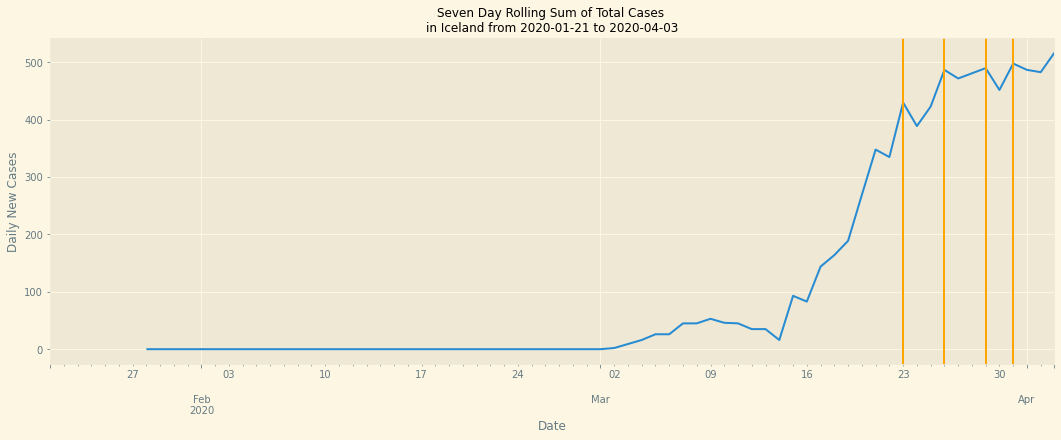

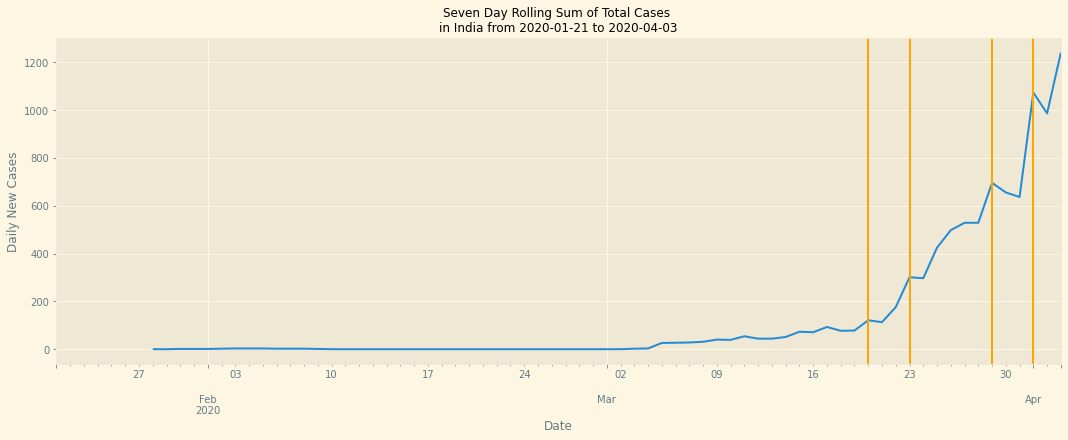

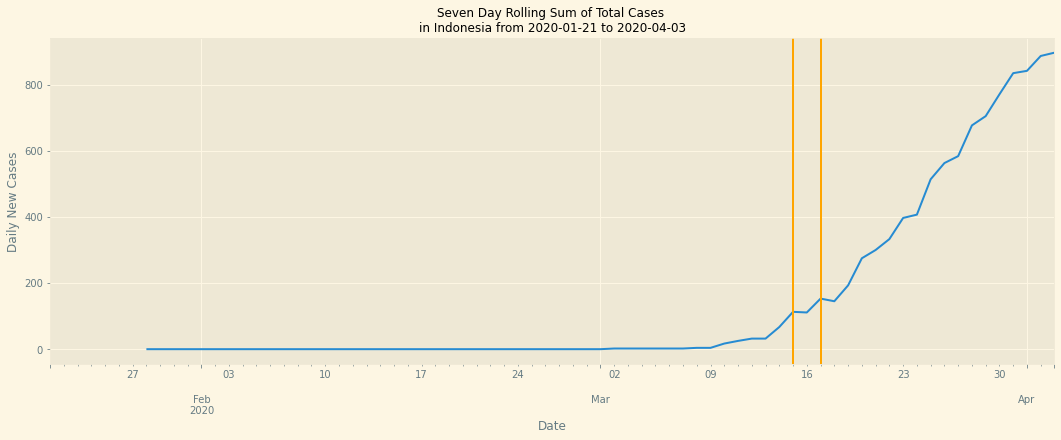

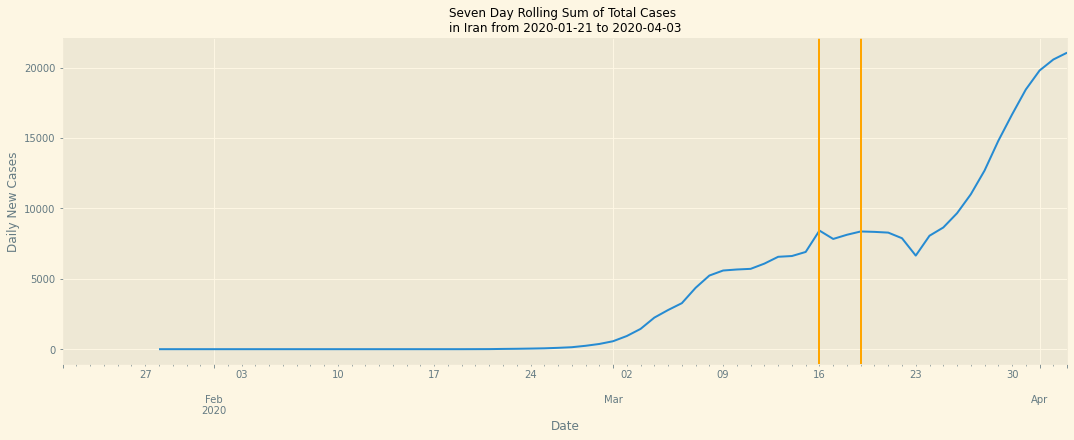

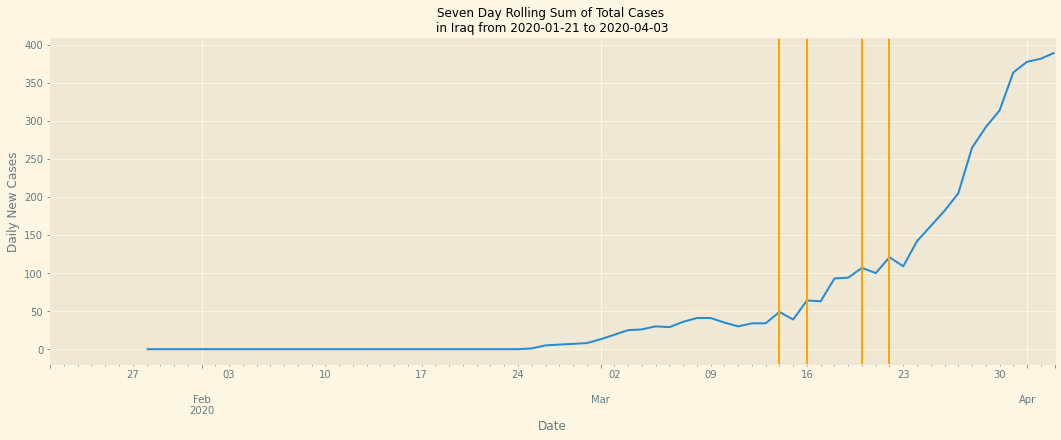

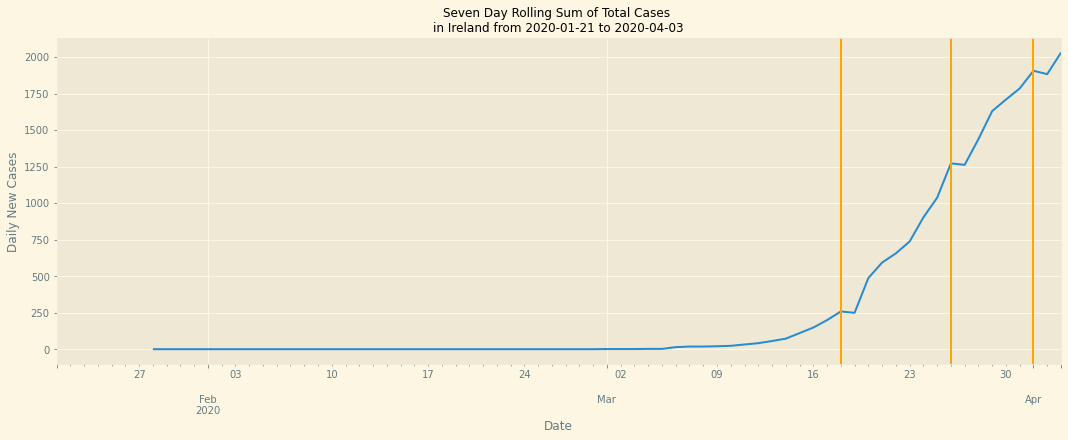

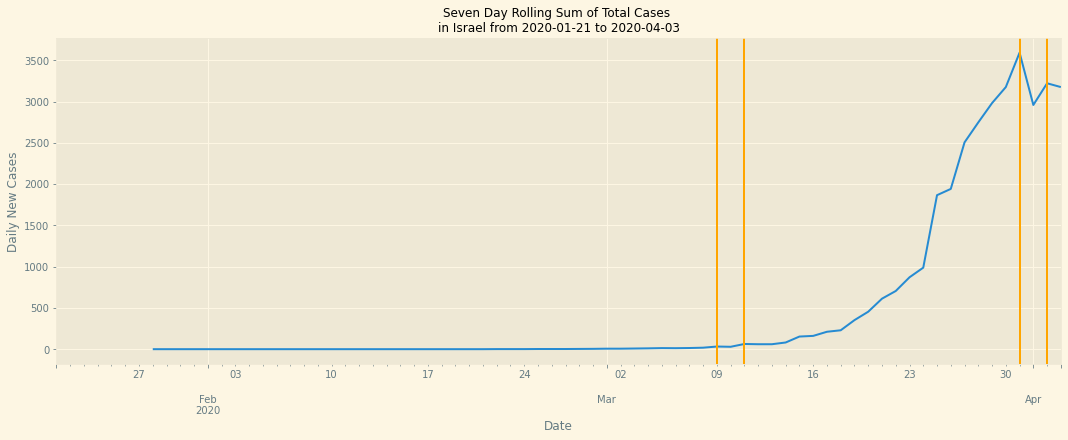

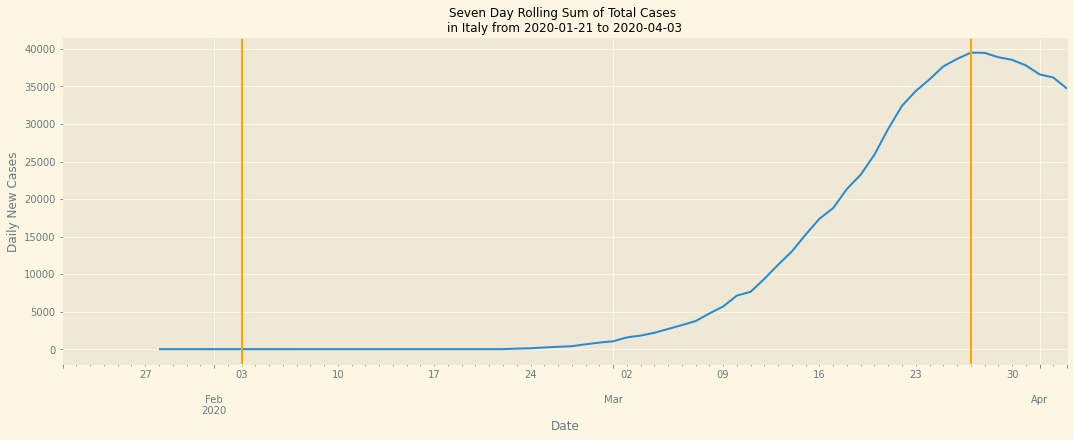

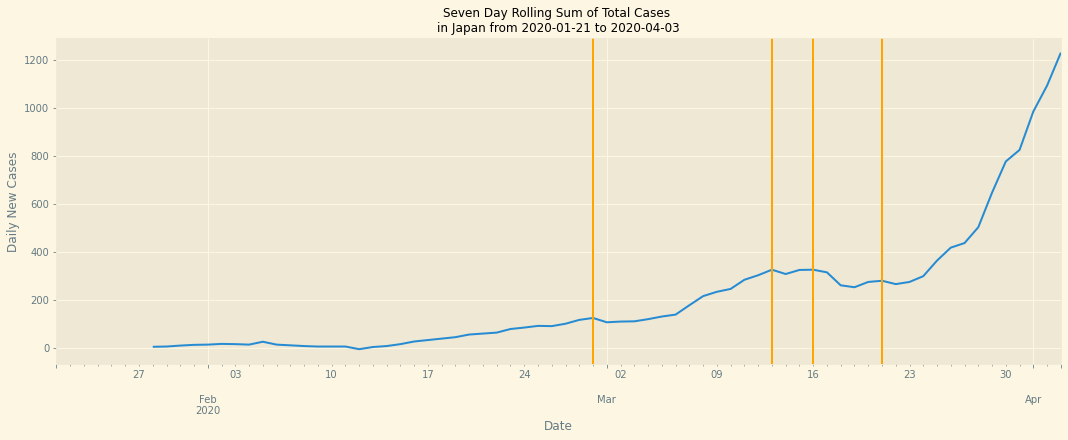

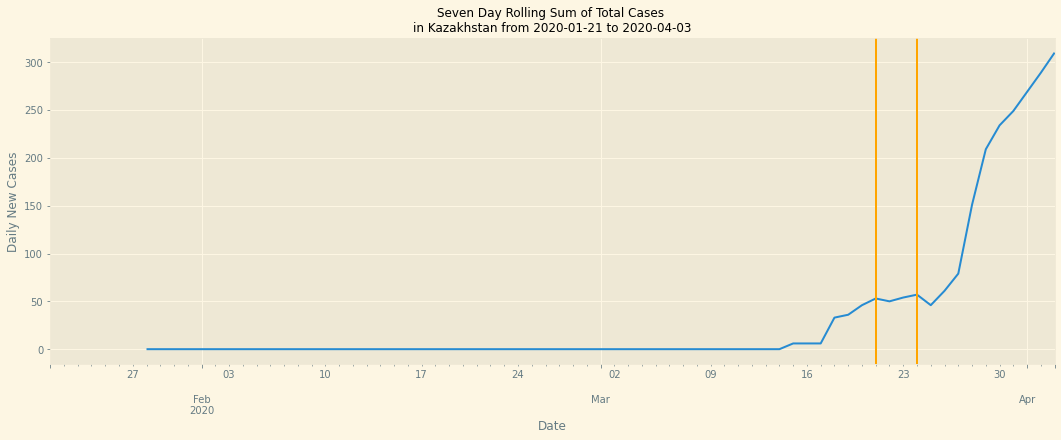

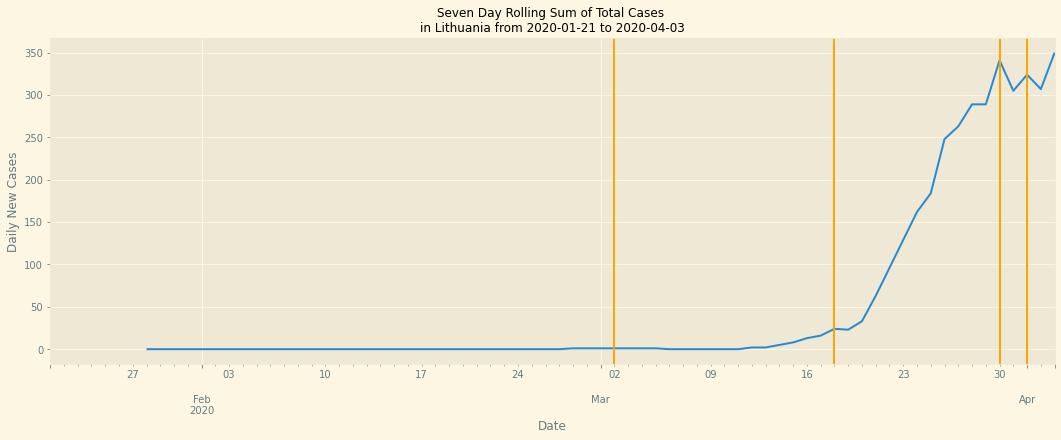

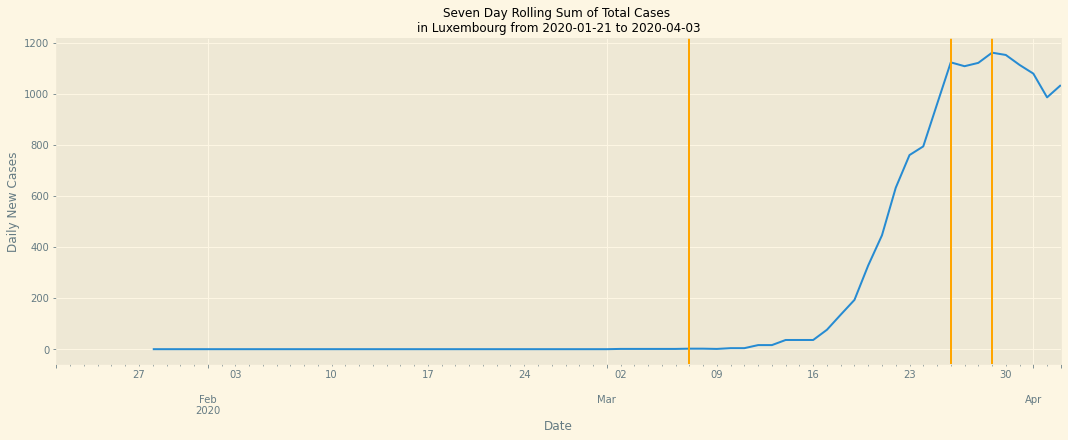

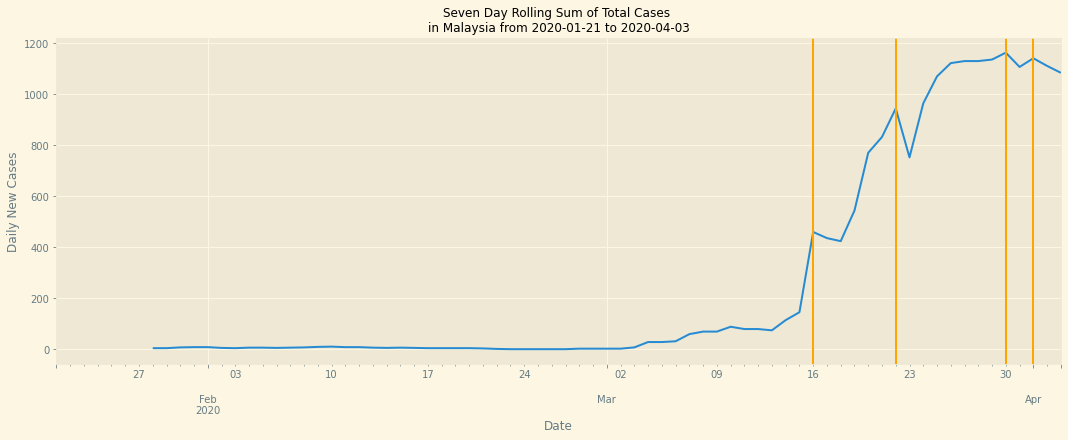

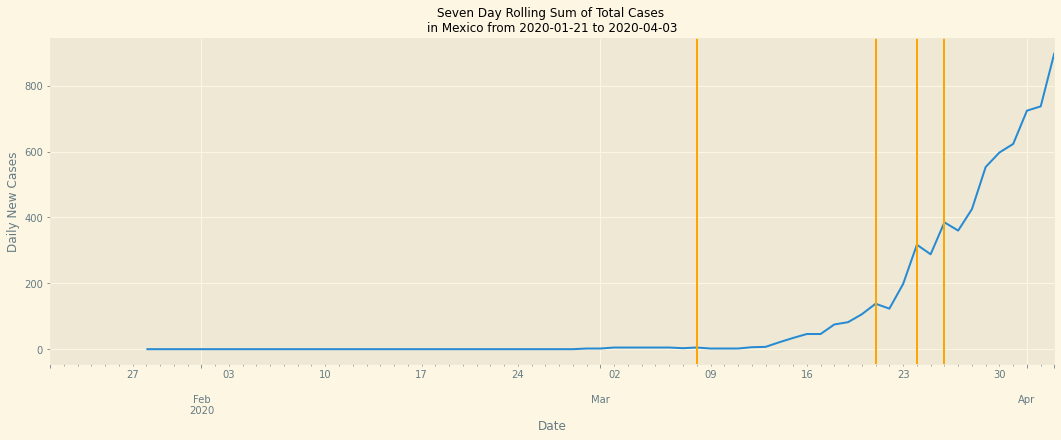

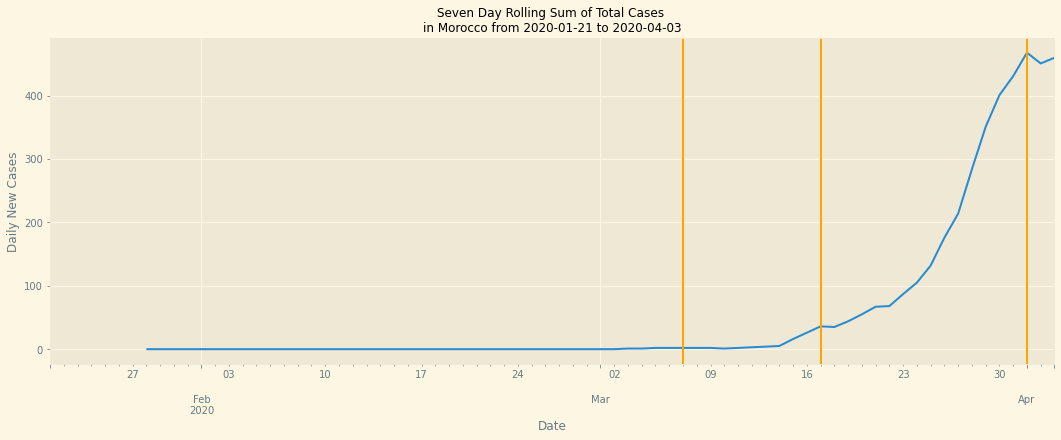

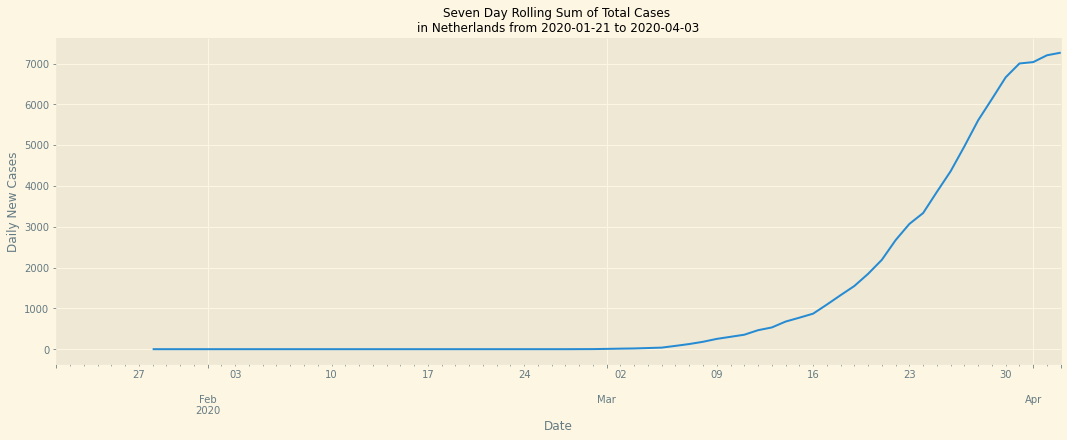

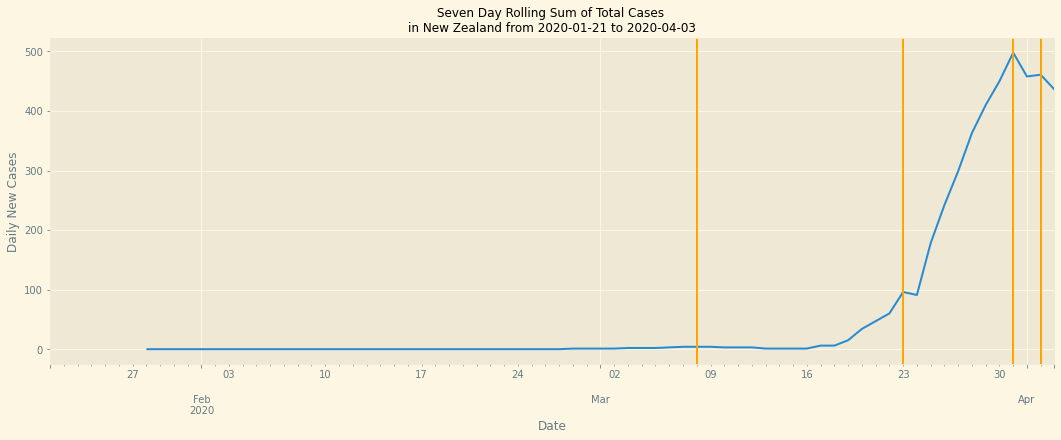

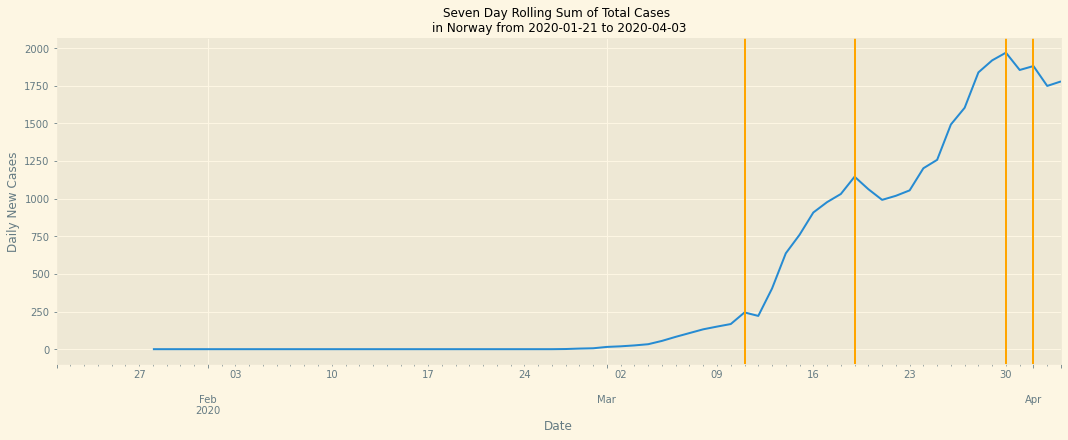

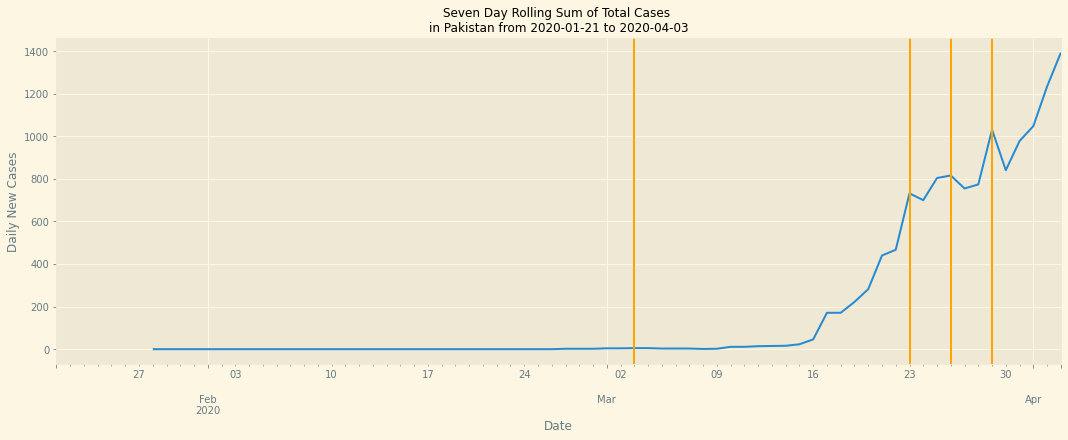

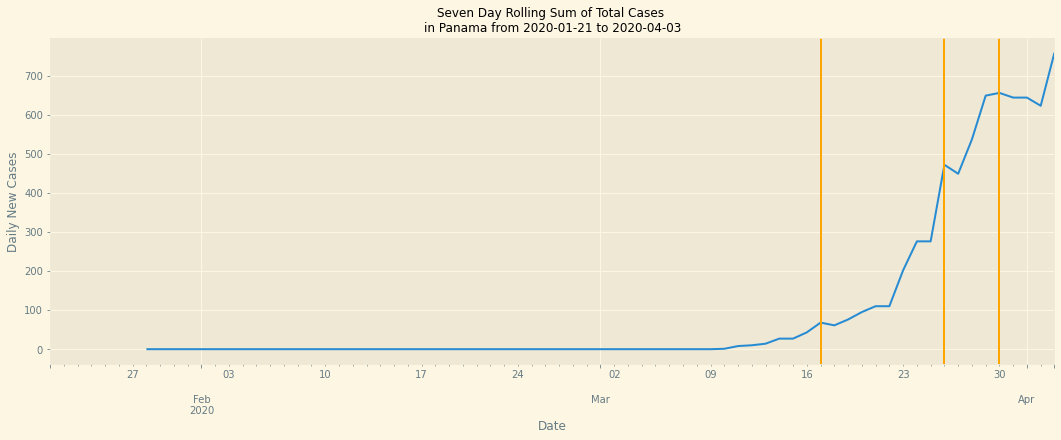

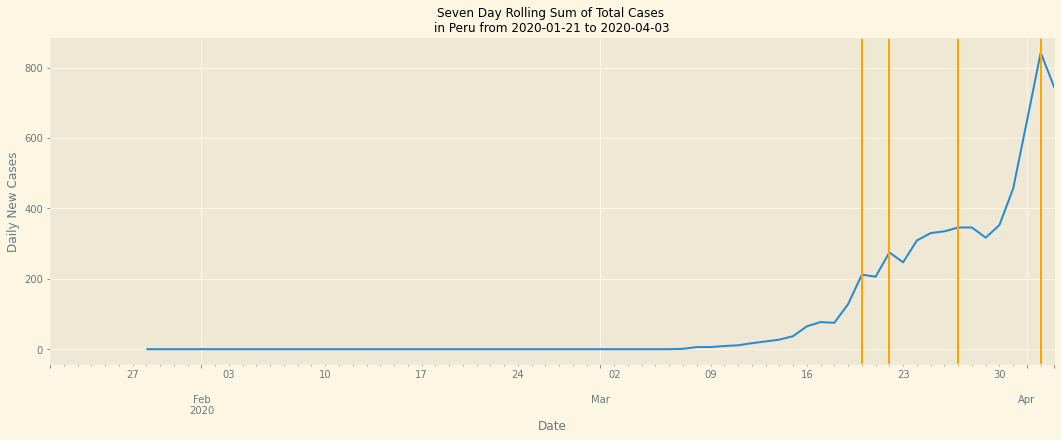

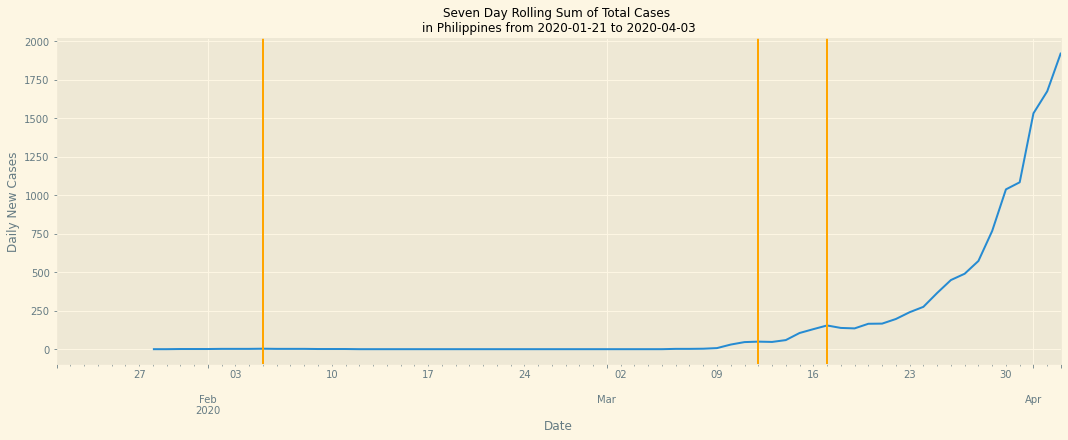

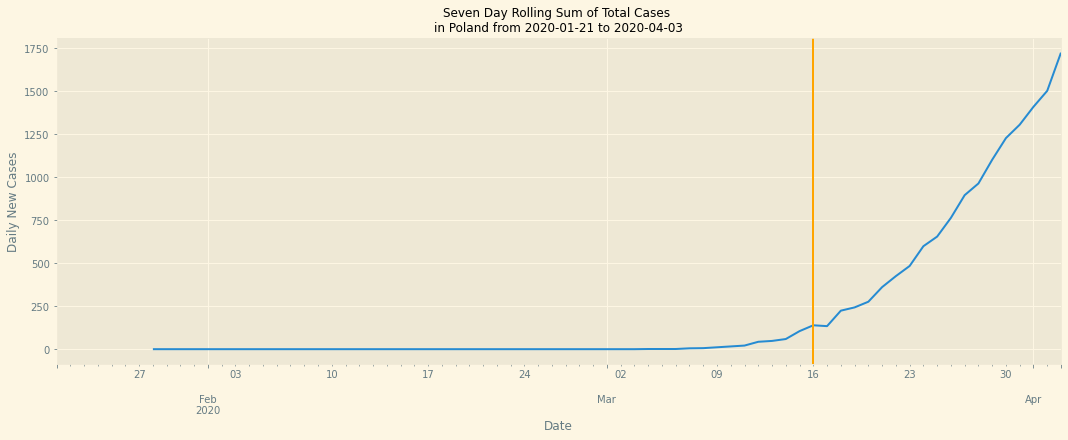

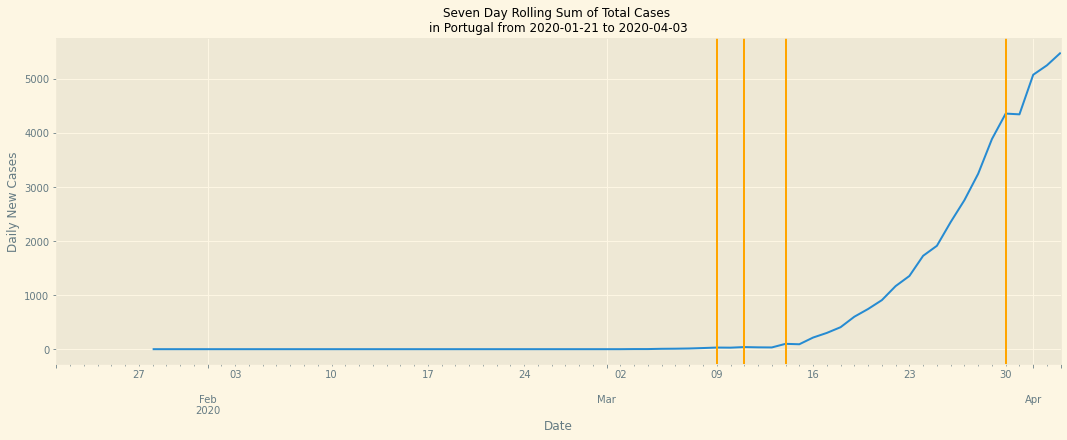

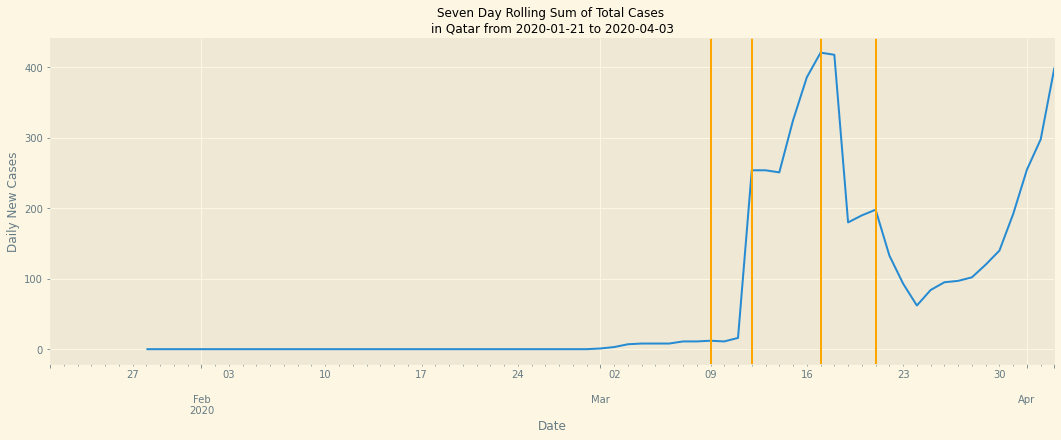

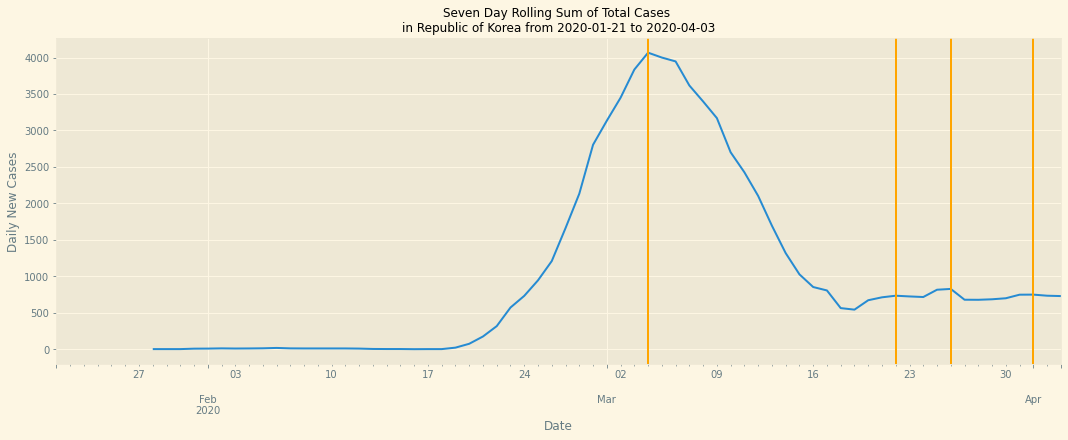

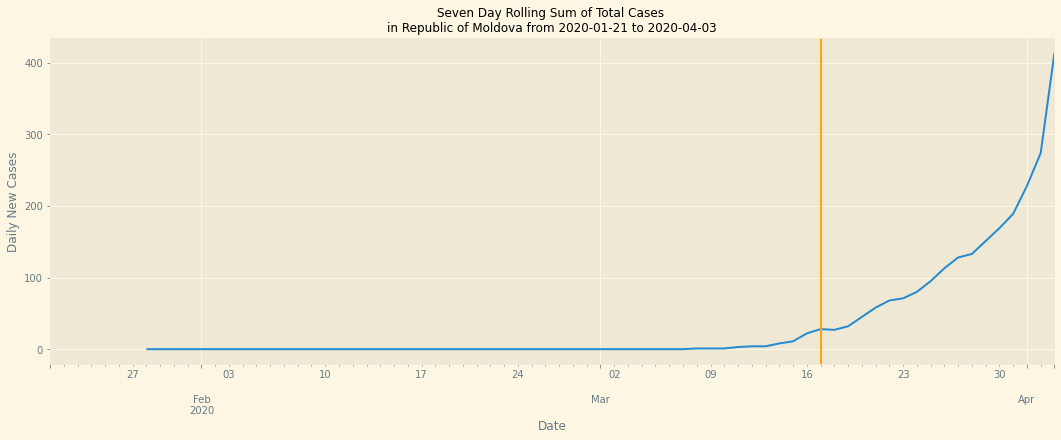

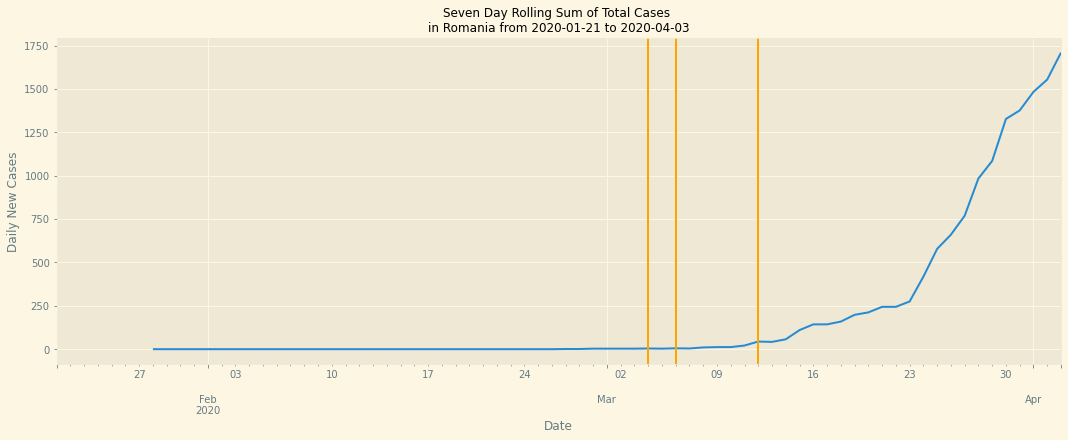

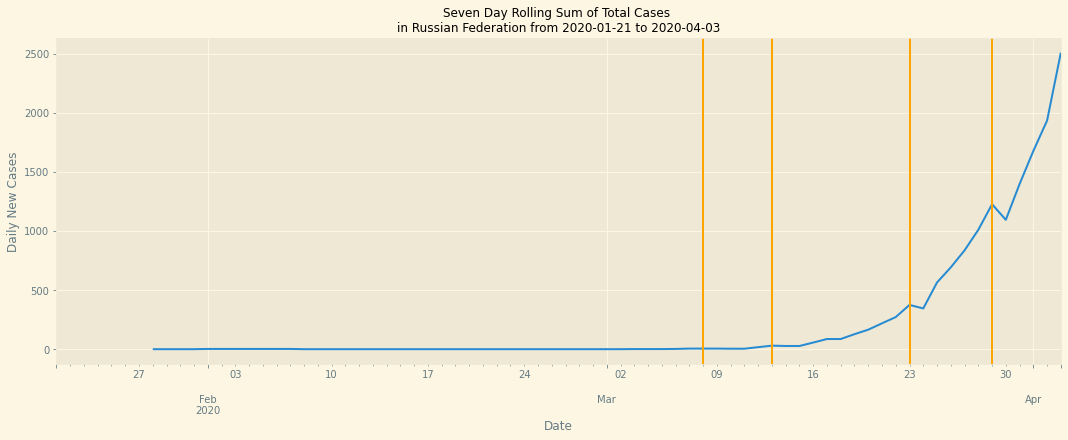

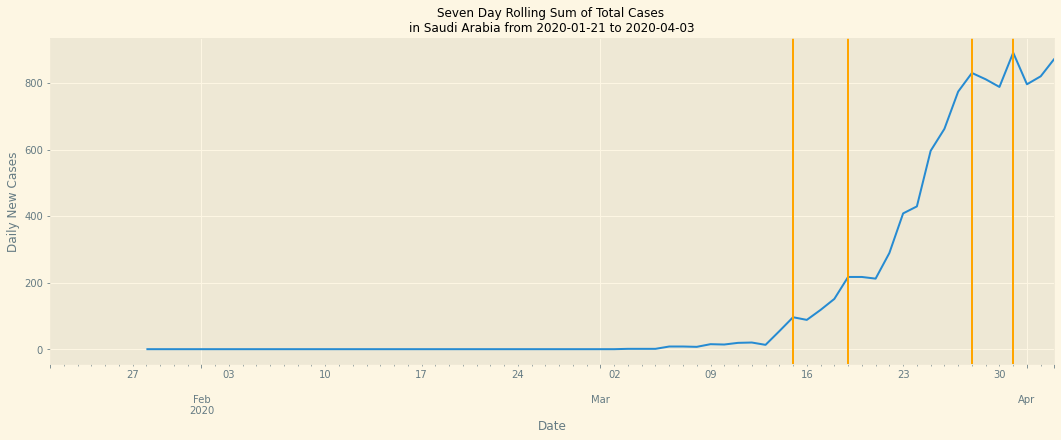

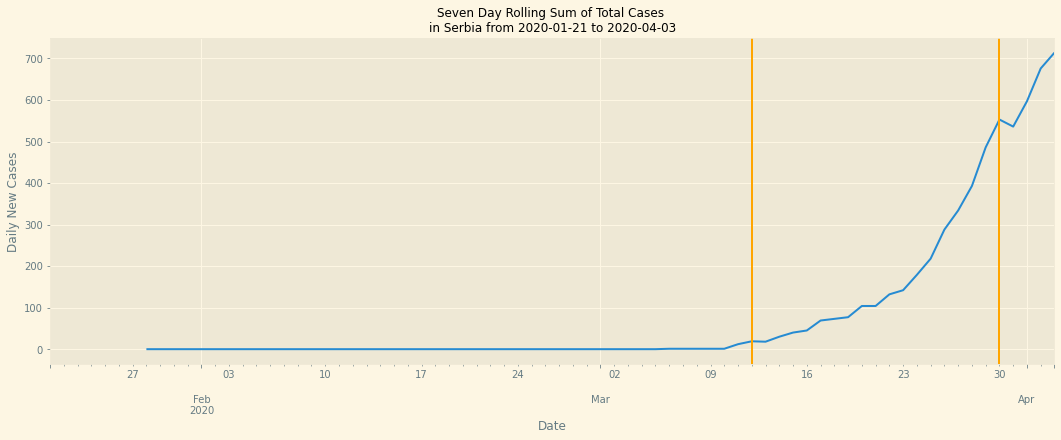

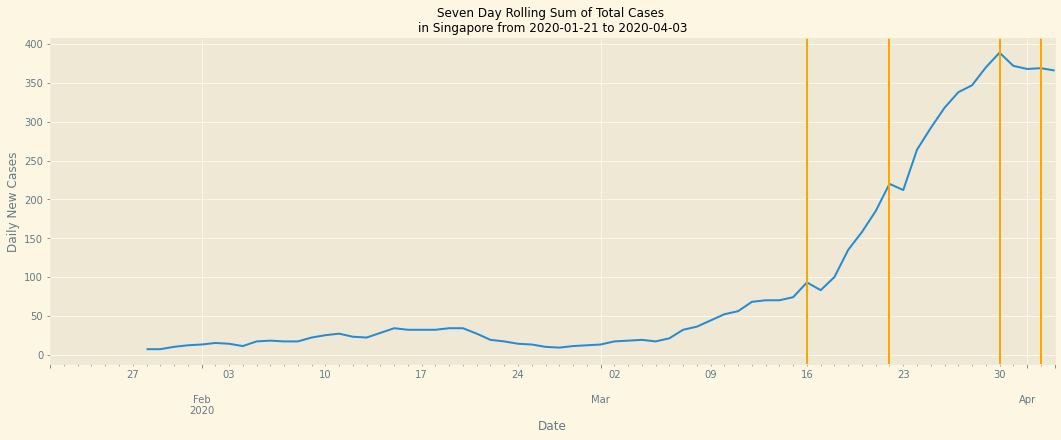

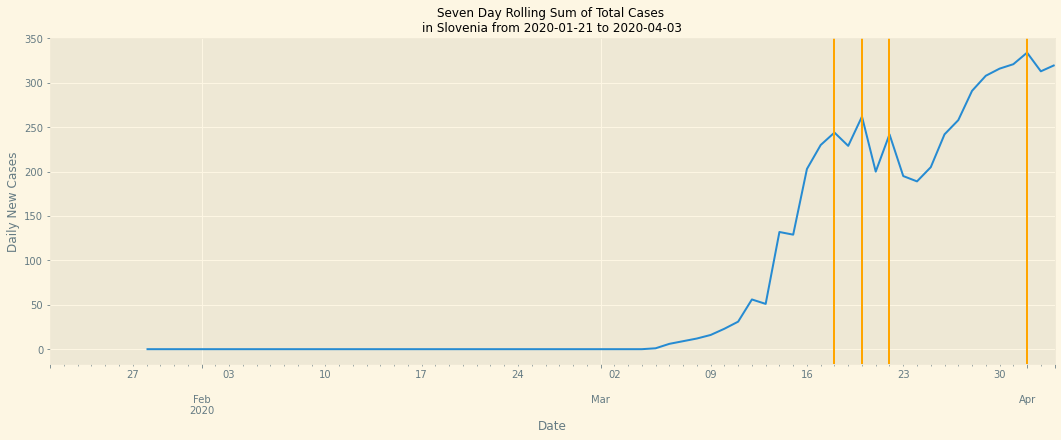

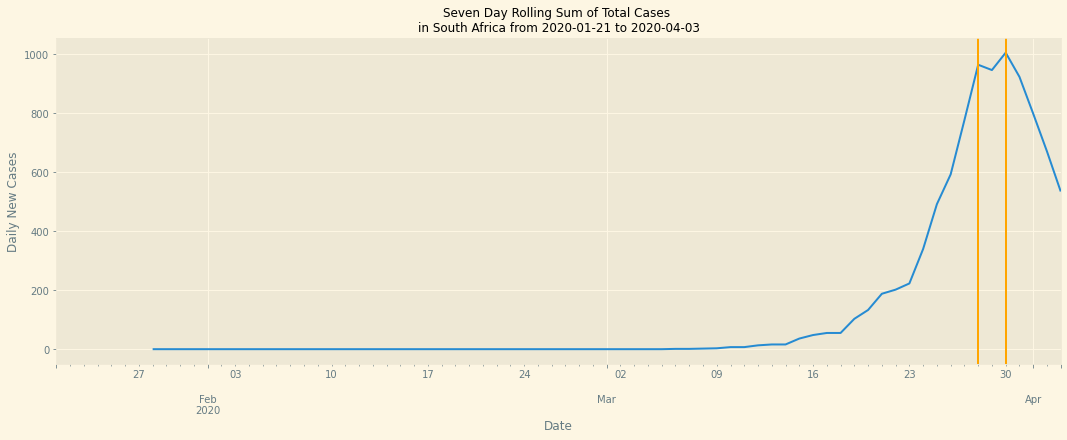

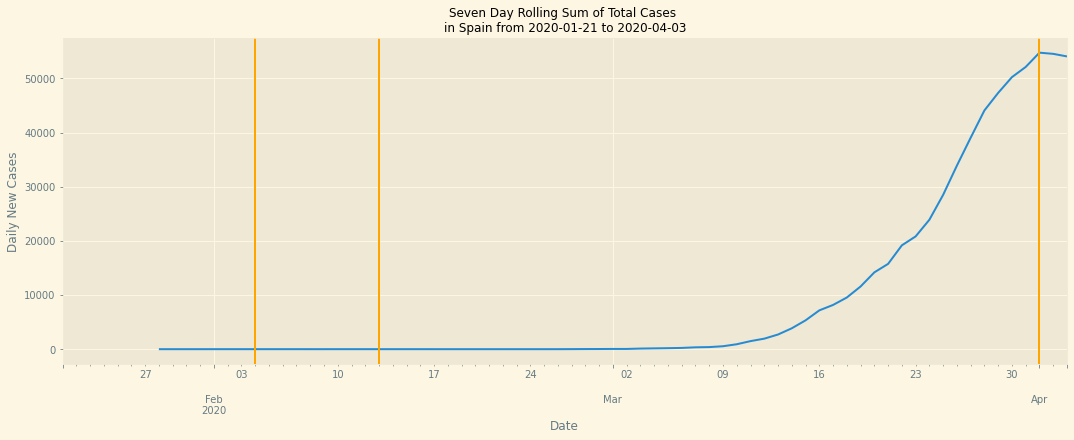

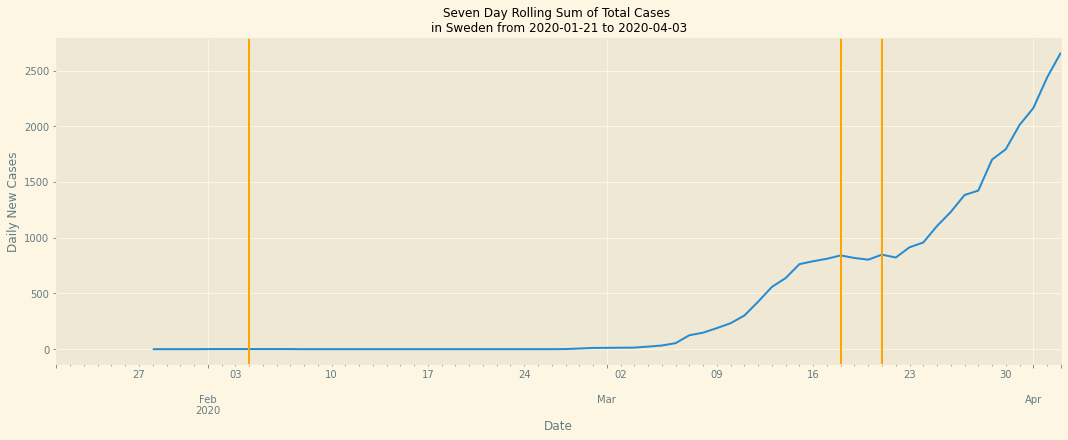

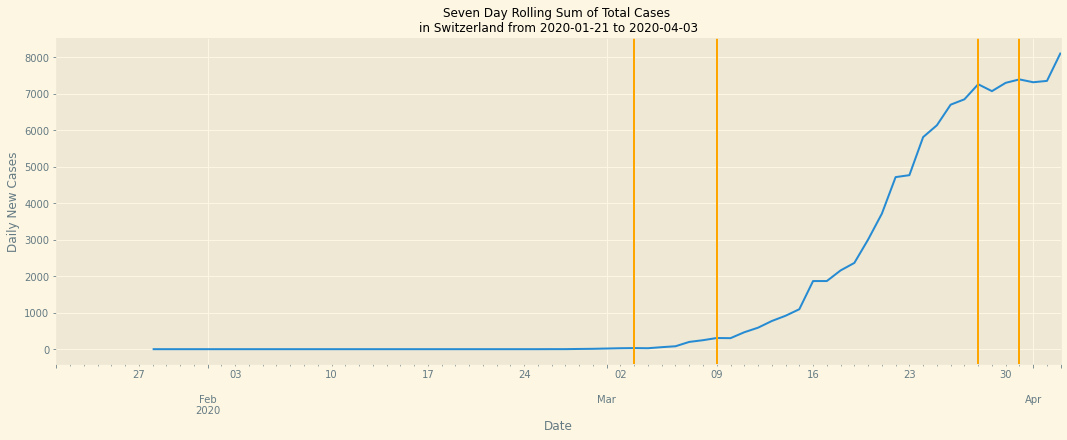

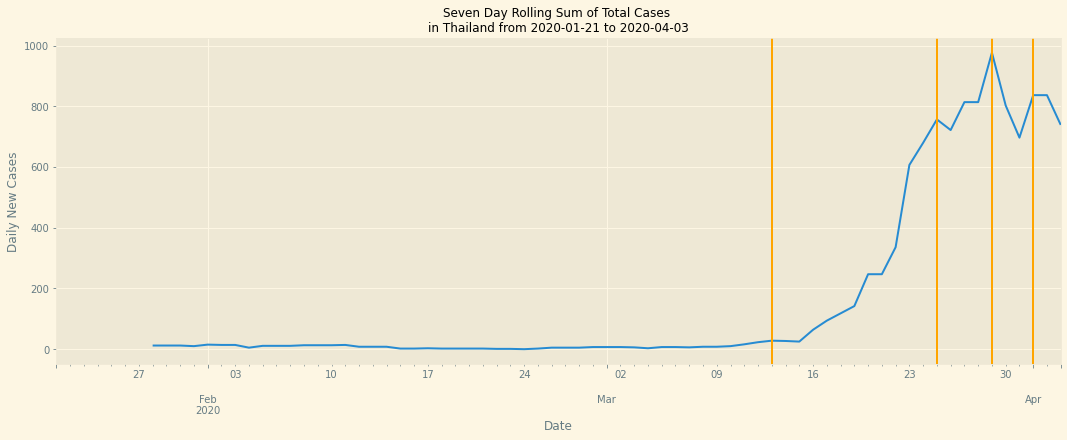

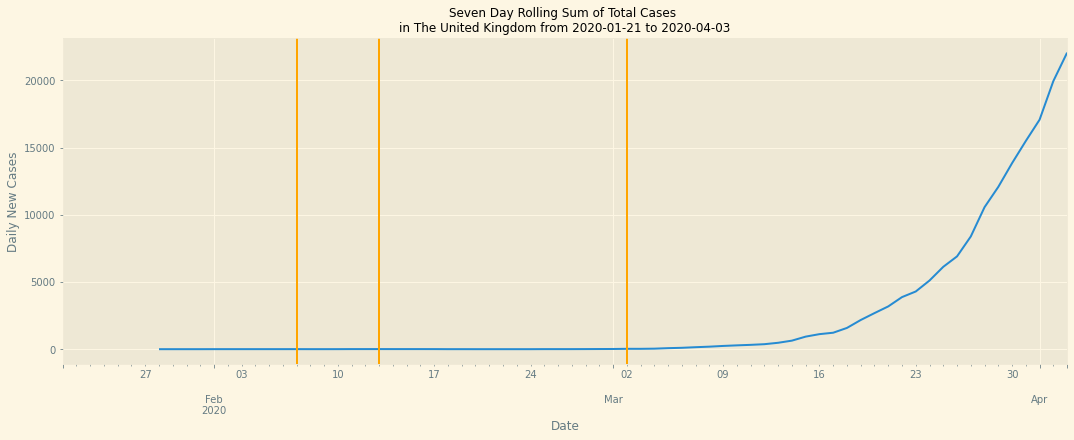

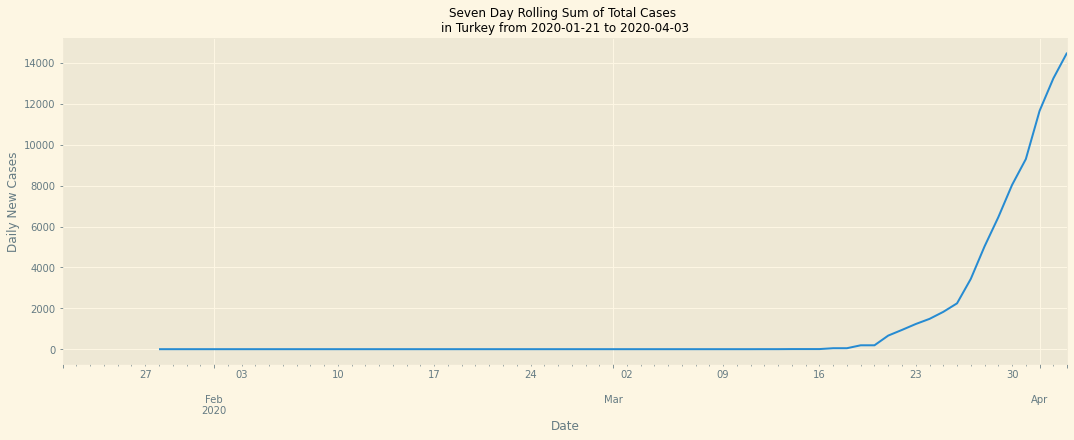

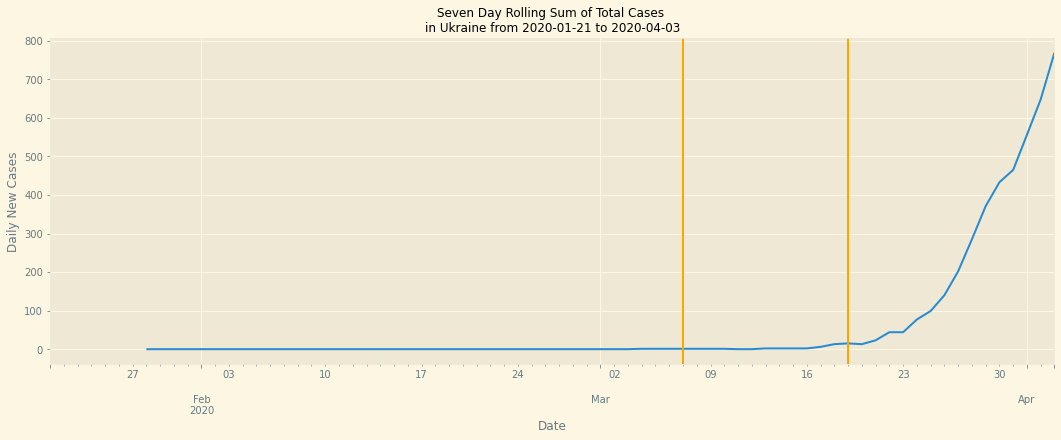

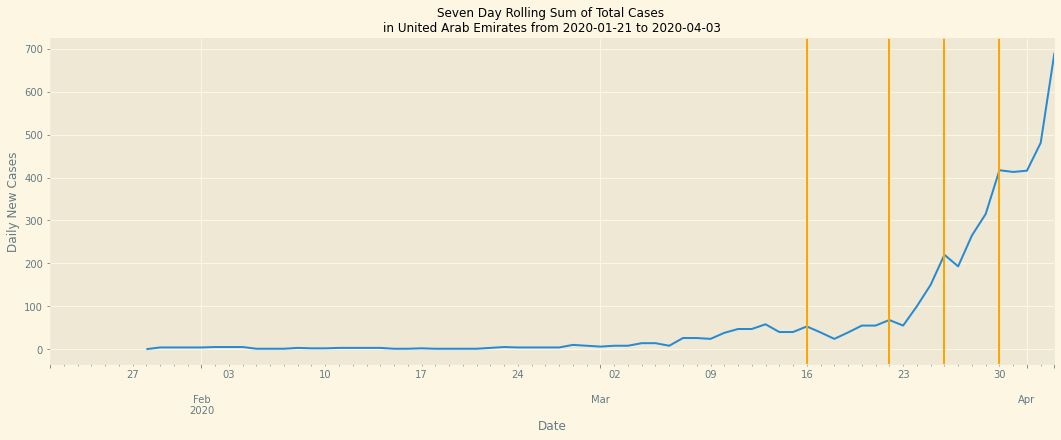

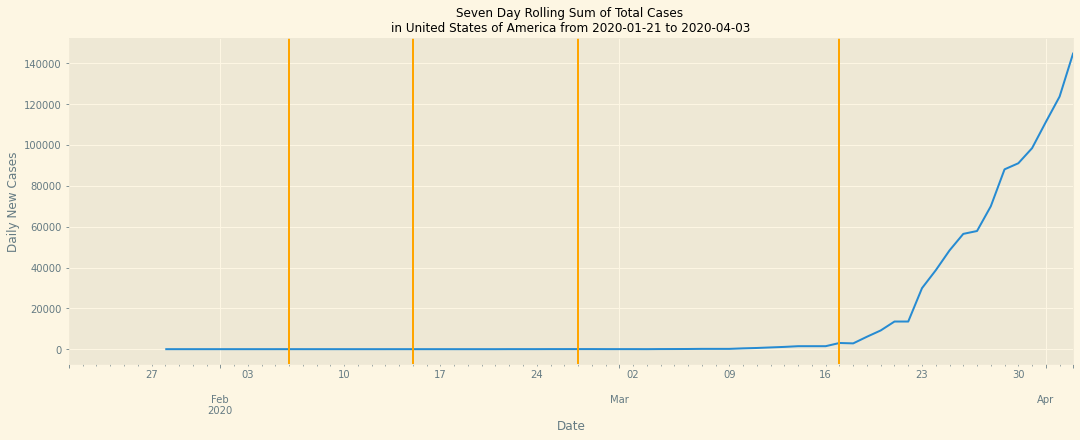

In [11]:
NUM_PEAKS = 4
CASES_THRESHOLD = 300
plot_all(NUM_PEAKS, CASES_THRESHOLD)

In [12]:
def new_cases():
    """WHO New Cases in Brazil manually copied from sitreps"""
    total_cases = {
        '2020-04-11':17857,
        '2020-04-10':15927,
        '2020-04-9' :13717,
        '2020-04-8' :12056,
        '2020-04-7' :11130,
        '2020-04-6' :10278,
        '2020-04-5' :9056,
        '2020-04-4' :7910,
        '2020-04-3' :6836,
        '2020-04-2' :5717,
    }
    s = pd.Series(total_cases)
    s.index = pd.to_datetime(s.index)
    s = s.sort_index()
    s.name = 'Brazil'
    return s

In [13]:
s = new_cases()
s

2020-04-02     5717
2020-04-03     6836
2020-04-04     7910
2020-04-05     9056
2020-04-06    10278
2020-04-07    11130
2020-04-08    12056
2020-04-09    13717
2020-04-10    15927
2020-04-11    17857
Name: Brazil, dtype: int64